# Kolmogorov-Arnold Network (KAN)

In [1]:
from kan import KAN, create_dataset
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0, device=device)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

cuda


(torch.Size([3000, 4]), torch.Size([3000, 1]))

In [2]:
# train the model
model.train(dataset, opt="LBFGS", steps=50, lamb=5e-5, lamb_entropy=2., device=device)

train loss: 6.09e-03 | test loss: 6.31e-03 | reg: 7.13e+00 : 100%|██| 50/50 [00:07<00:00,  6.45it/s]


{'train_loss': [array(0.41433772, dtype=float32),
  array(0.19768886, dtype=float32),
  array(0.13087918, dtype=float32),
  array(0.06907739, dtype=float32),
  array(0.03466889, dtype=float32),
  array(0.02754203, dtype=float32),
  array(0.02236201, dtype=float32),
  array(0.01851819, dtype=float32),
  array(0.01355777, dtype=float32),
  array(0.01114178, dtype=float32),
  array(0.01032609, dtype=float32),
  array(0.00981268, dtype=float32),
  array(0.00947436, dtype=float32),
  array(0.00895333, dtype=float32),
  array(0.0087237, dtype=float32),
  array(0.00836586, dtype=float32),
  array(0.00796148, dtype=float32),
  array(0.00780805, dtype=float32),
  array(0.00766717, dtype=float32),
  array(0.00741818, dtype=float32),
  array(0.00743723, dtype=float32),
  array(0.0072568, dtype=float32),
  array(0.00692147, dtype=float32),
  array(0.00651037, dtype=float32),
  array(0.00630864, dtype=float32),
  array(0.00712508, dtype=float32),
  array(0.00682169, dtype=float32),
  array(0.006411

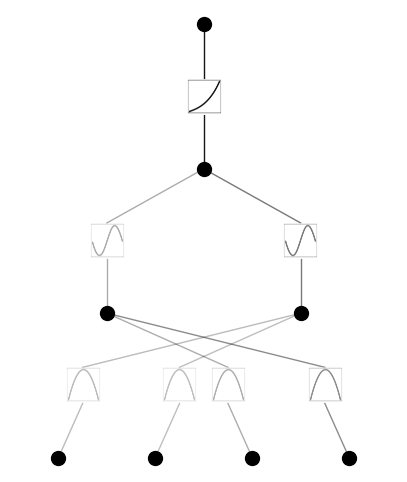

In [3]:
model = model.prune()
model(dataset['train_input'])
model.plot()

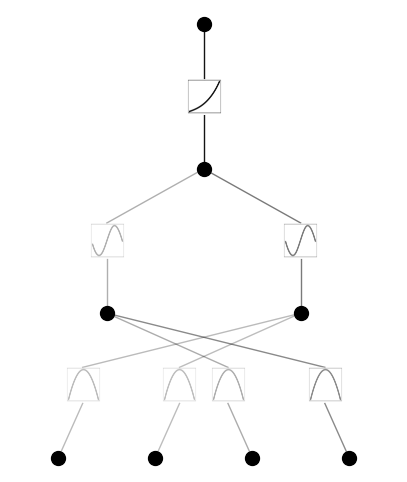

In [7]:
model.plot(beta=10)

In [4]:
model.auto_symbolic()

fixing (0,0,0) with abs, r2=0.8442462086677551
fixing (0,0,1) with x^2, r2=0.999998927116394
fixing (0,1,0) with tanh, r2=0.7874206900596619
fixing (0,1,1) with x^2, r2=0.9999997019767761
fixing (0,2,0) with x^2, r2=0.9999996423721313
fixing (0,2,1) with gaussian, r2=0.744812548160553
fixing (0,3,0) with x^2, r2=0.9999992251396179
fixing (0,3,1) with gaussian, r2=0.6414632201194763
fixing (1,0,0) with sin, r2=0.9998893141746521
fixing (1,1,0) with sin, r2=0.9998884201049805
fixing (2,0,0) with exp, r2=0.9999954700469971


In [5]:
formula, variables = model.symbolic_formula()
formula[0]

1.02*exp(0.49*sin(3.14*x_3**2 + 3.14*x_4**2 - 6.28) - 0.49*sin(3.14*x_1**2 + 3.14*x_2**2 + 3.14 + 0.02*exp(-83.98*(-0.98*x_4 - 1)**2) + 0.02*exp(-80.37*(-0.98*x_3 - 1)**2))) - 0.02

## Function fitting

In [2]:
from kan import KAN, create_dataset
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.001, lamb_entropy=2.);

train loss: 1.07e-02 | test loss: 1.09e-02 | reg: 6.53e+00 : 100%|██| 20/20 [00:03<00:00,  6.35it/s]


description:   0%|                                                           | 0/50 [00:00<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [24]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=7)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 7]), torch.Size([1000, 1]))

In [25]:
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[7,5,1], grid=5, k=3, seed=0)

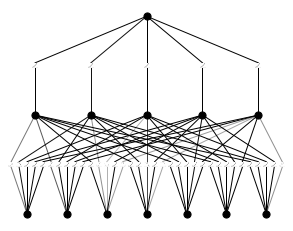

In [26]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [27]:
# train the model
model.train(dataset, opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=10.)

train loss: 9.84e-02 | test loss: 1.03e-01 | reg: 3.46e+01 : 100%|██| 50/50 [00:08<00:00,  5.57it/s]


{'train_loss': [array(0.12136877, dtype=float32),
  array(0.0996988, dtype=float32),
  array(0.09379077, dtype=float32),
  array(0.09332357, dtype=float32),
  array(0.09211436, dtype=float32),
  array(0.09291278, dtype=float32),
  array(0.09351043, dtype=float32),
  array(0.09563819, dtype=float32),
  array(0.09062695, dtype=float32),
  array(0.09094427, dtype=float32),
  array(0.09131847, dtype=float32),
  array(0.09109137, dtype=float32),
  array(0.08868645, dtype=float32),
  array(0.08780888, dtype=float32),
  array(0.08696575, dtype=float32),
  array(0.08647335, dtype=float32),
  array(0.08618341, dtype=float32),
  array(0.08564259, dtype=float32),
  array(0.08540654, dtype=float32),
  array(0.08510268, dtype=float32),
  array(0.08463527, dtype=float32),
  array(0.08435148, dtype=float32),
  array(0.0840088, dtype=float32),
  array(0.08395361, dtype=float32),
  array(0.08392111, dtype=float32),
  array(0.08509728, dtype=float32),
  array(0.08491676, dtype=float32),
  array(0.084949

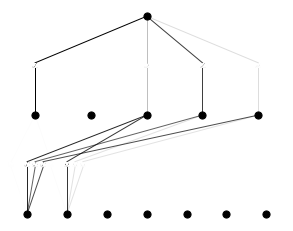

In [28]:
model.plot()

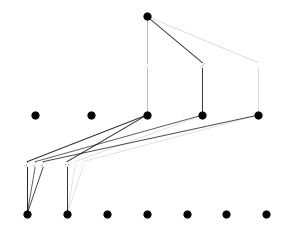

In [29]:
model.prune()
model.plot(mask=True)

In [19]:
model.train(dataset, opt="LBFGS", steps=50)

train loss: 2.89e-03 | test loss: 3.02e-03 | reg: 1.02e+01 : 100%|██| 50/50 [00:03<00:00, 13.67it/s]


{'train_loss': [array(0.02350469, dtype=float32),
  array(0.02222909, dtype=float32),
  array(0.01834214, dtype=float32),
  array(0.00959954, dtype=float32),
  array(0.00334536, dtype=float32),
  array(0.00310236, dtype=float32),
  array(0.00309251, dtype=float32),
  array(0.00304651, dtype=float32),
  array(0.00302985, dtype=float32),
  array(0.00302959, dtype=float32),
  array(0.00302923, dtype=float32),
  array(0.00302766, dtype=float32),
  array(0.00302721, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302721, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.00302722, dtype=float32),
  array(0.0030

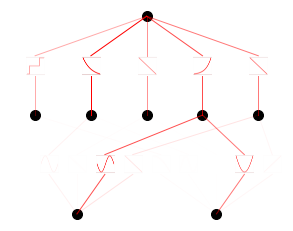

In [20]:
model.plot()

In [30]:
mode = "auto" 
# mode = "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9576186537742615
fixing (0,0,1) with sin, r2=0.3239237368106842
fixing (0,0,2) with sin, r2=0.997187077999115
fixing (0,0,3) with sin, r2=0.9861669540405273
fixing (0,0,4) with sin, r2=0.9962937831878662
fixing (0,1,0) with abs, r2=0.9564622044563293
fixing (0,1,1) with exp, r2=0.6534761190414429
fixing (0,1,2) with x^2, r2=0.9945873618125916
fixing (0,1,3) with x^2, r2=0.9894022345542908
fixing (0,1,4) with x^2, r2=0.9634655117988586
fixing (0,2,0) with sin, r2=0.41642436385154724
fixing (0,2,1) with sin, r2=0.6230586767196655
fixing (0,2,2) with sin, r2=0.6731359958648682
fixing (0,2,3) with tanh, r2=0.48331400752067566
fixing (0,2,4) with abs, r2=0.5501207709312439
fixing (0,3,0) with sin, r2=0.31799718737602234
fixing (0,3,1) with sin, r2=0.3138067126274109
fixing (0,3,2) with tanh, r2=0.5238220691680908
fixing (0,3,3) with tanh, r2=0.6943134665489197
fixing (0,3,4) with sin, r2=0.5755106210708618
fixing (0,4,0) with tanh, r2=0.3921043574810028
fixing 

In [31]:
model.symbolic_formula()[0][0]

-0.14*(-0.33*(-x_2 - 0.08)**2 + sin(2.9*x_1 + 3.19) + 0.01*tanh(10.0*x_6 - 10.0) + 0.05)**3 + 1.76*tanh(2.05*(x_2 + 0.01)**2 + 1.32*sin(2.76*x_1 - 6.19) - 2.83) - 1.82*tanh(-0.25*(0.08 - x_2)**2 + 0.68*sin(3.29*x_1 - 3.21) + 0.01*tanh(9.8*x_4 - 10.0) + 0.59) + 3.12*Abs(0.09*sin(3.01*x_1 + 9.58) + 0.01*sin(10.0*x_6 - 3.0) + 0.01*tanh(10.0*x_5 + 9.6) - 0.03*Abs(10.0*x_2 + 0.2)) + 3.6